# Results

In [1]:
import numpy as np
import pandas as pd
import neutron_stars as ns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.image as mpimg

In [2]:
from IPython.core.pylabtools import figsize
figsize(30, 10)

In [3]:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)

# Spectra --> EOS
---
### HP Search Results

In [4]:
training_df = pd.read_csv('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2eos/results.csv')

In [5]:
hp_trial_erros = ns.analysis.calculate_hp_trial_errors(paradigm='spectra2eos', num_files=500, targets=['c1', 'c2'])

100%|██████████| 323/323 [00:28<00:00, 11.16it/s]


In [6]:
hp_trial_erros.sort_values(by='error').head(5)

,error
61,2.511120
131,2.513336
14,2.516061
253,2.527259
78,2.528738


In [7]:
best_trial_id = int(hp_trial_erros.idxmin())

test_file = '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2eos/Predictions/validation_%05d_01.csv' % best_trial_id
df = pd.read_csv(test_file, index_col=0)[['c1', 'c2', 'pred_c1', 'pred_c2']]
test_error, _ = ns.analysis.mse(df, ['c1', 'c2'], ['pred_c1', 'pred_c2'])

print('Best trial:', best_trial_id, 'Val:', hp_trial_erros.loc[best_trial_id].values, 'Test:', test_error)

Best trial: 61 Val: [2.5111197] Test: 0.01098320172285113


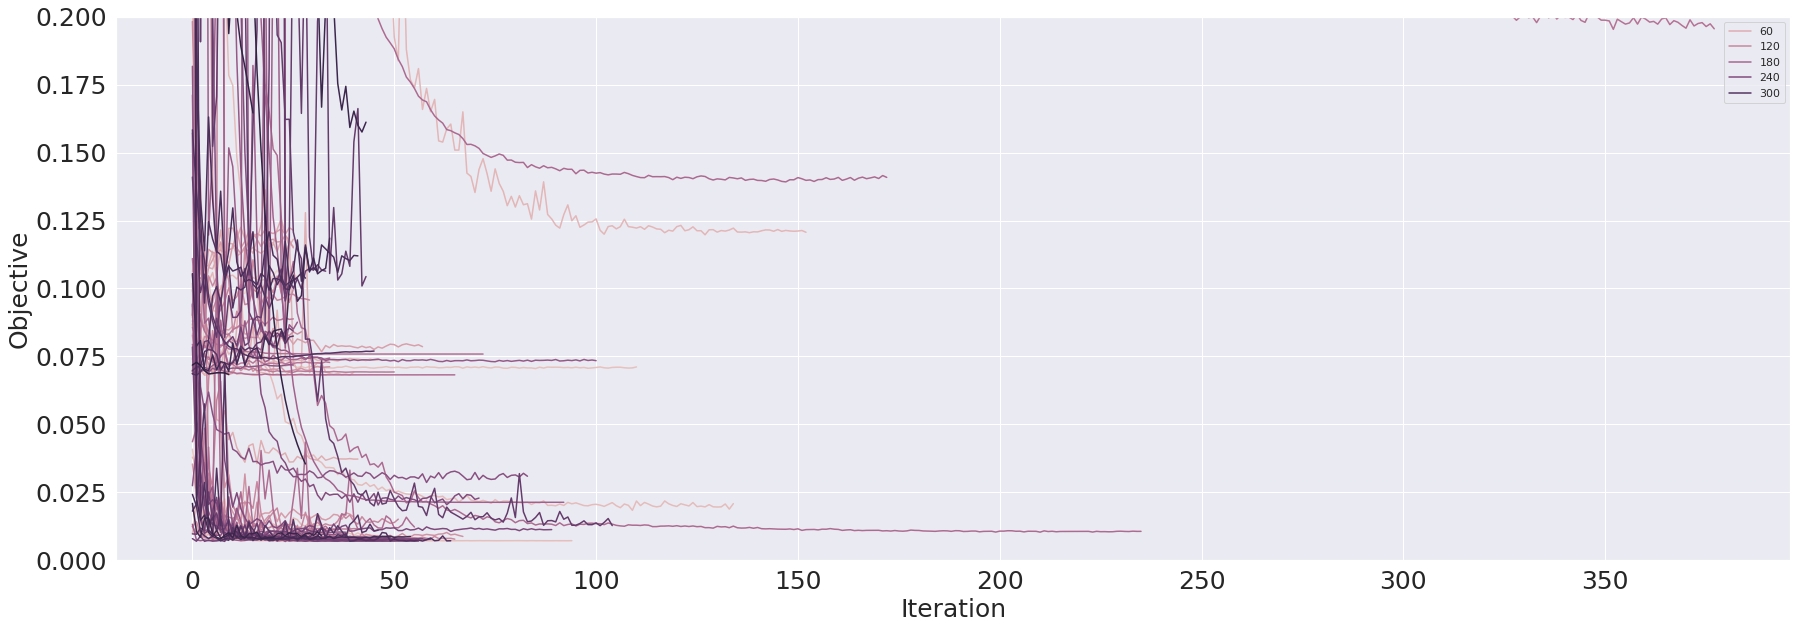

In [8]:
sns.lineplot(x='Iteration', y='Objective', data=training_df, hue='Trial-ID'); plt.ylim(0, .2);
sns.lineplot(x='Iteration', y='Objective', data=training_df[training_df['Trial-ID'] == best_trial_id], lw=5);

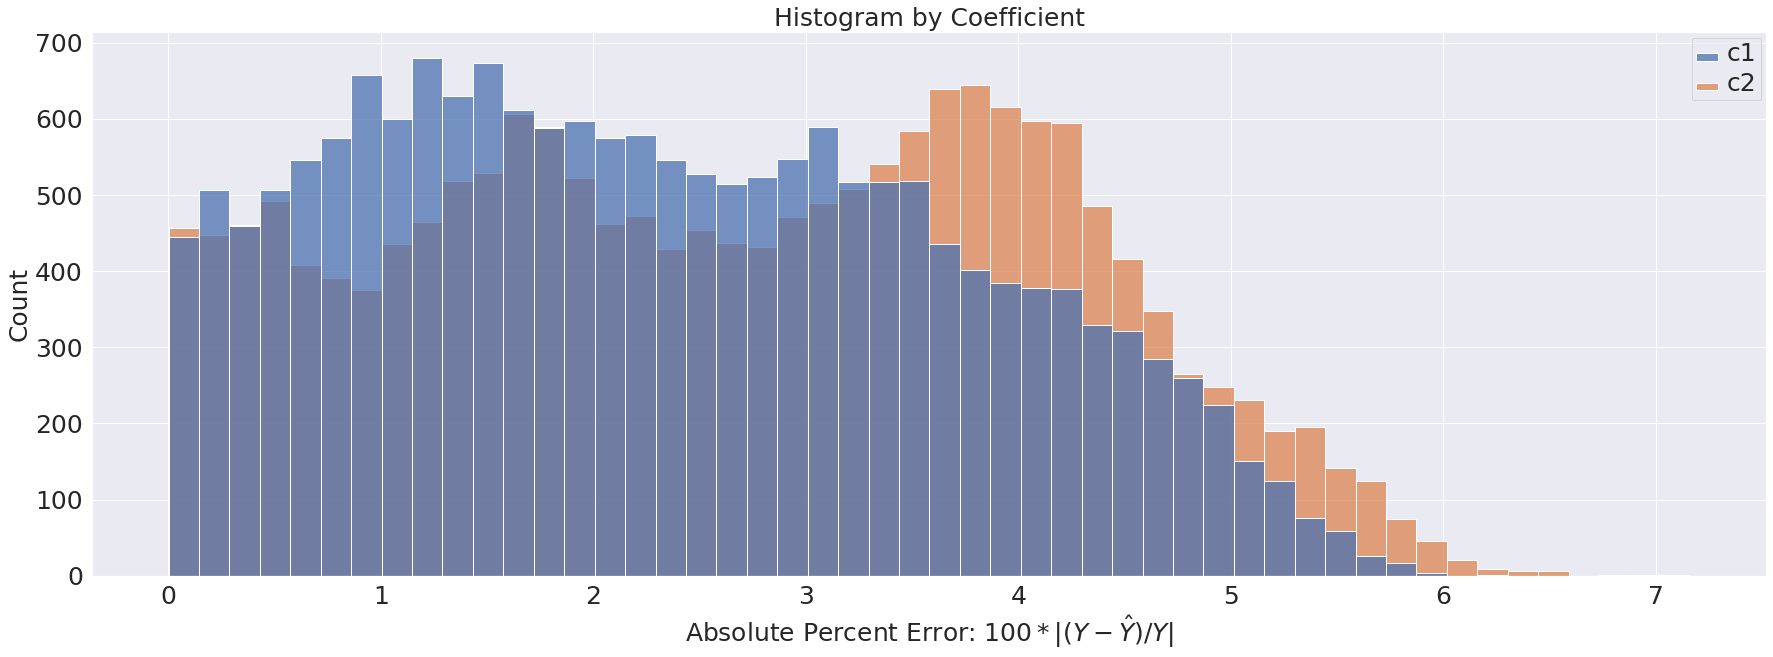

In [9]:
_, df_errors = ns.analysis.mape(df, ['c1', 'c2'], ['pred_c1', 'pred_c2'])

ax = sns.histplot(data=df_errors.abs()); plt.setp(ax.get_legend().get_texts(), fontsize='25')
plt.xlabel(r'Absolute Percent Error: $100 * |(Y - \hat{Y}) / Y|$', fontsize=25); plt.title('Histogram by Coefficient', fontsize=25);

### Cross Validation

In [10]:
ns.analysis.get_crossval_command(paradigm='spectra2eos', trial=61)

To run 10 fold cross-validation for this model:
 tf2 main.py --load_settings_from /baldig/physicstest/NeutronStarsData/SherpaResults/spectra2eos/Settings/00061.json


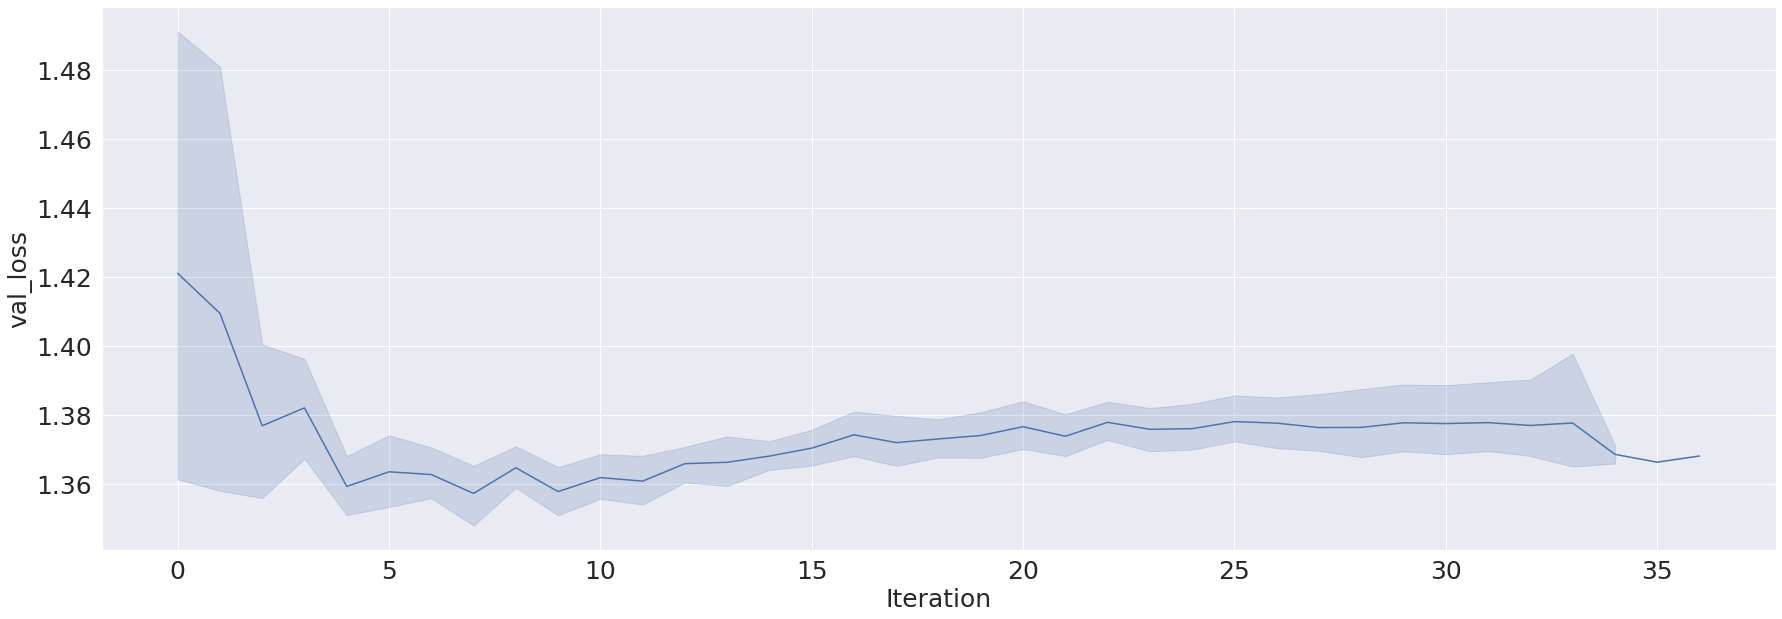

In [11]:
df = ns.analysis.cross_validation('Results/spectra2eos/Training/%05d_*.csv' % 61)
sns.lineplot(x='Iteration', y='val_loss', data=df);

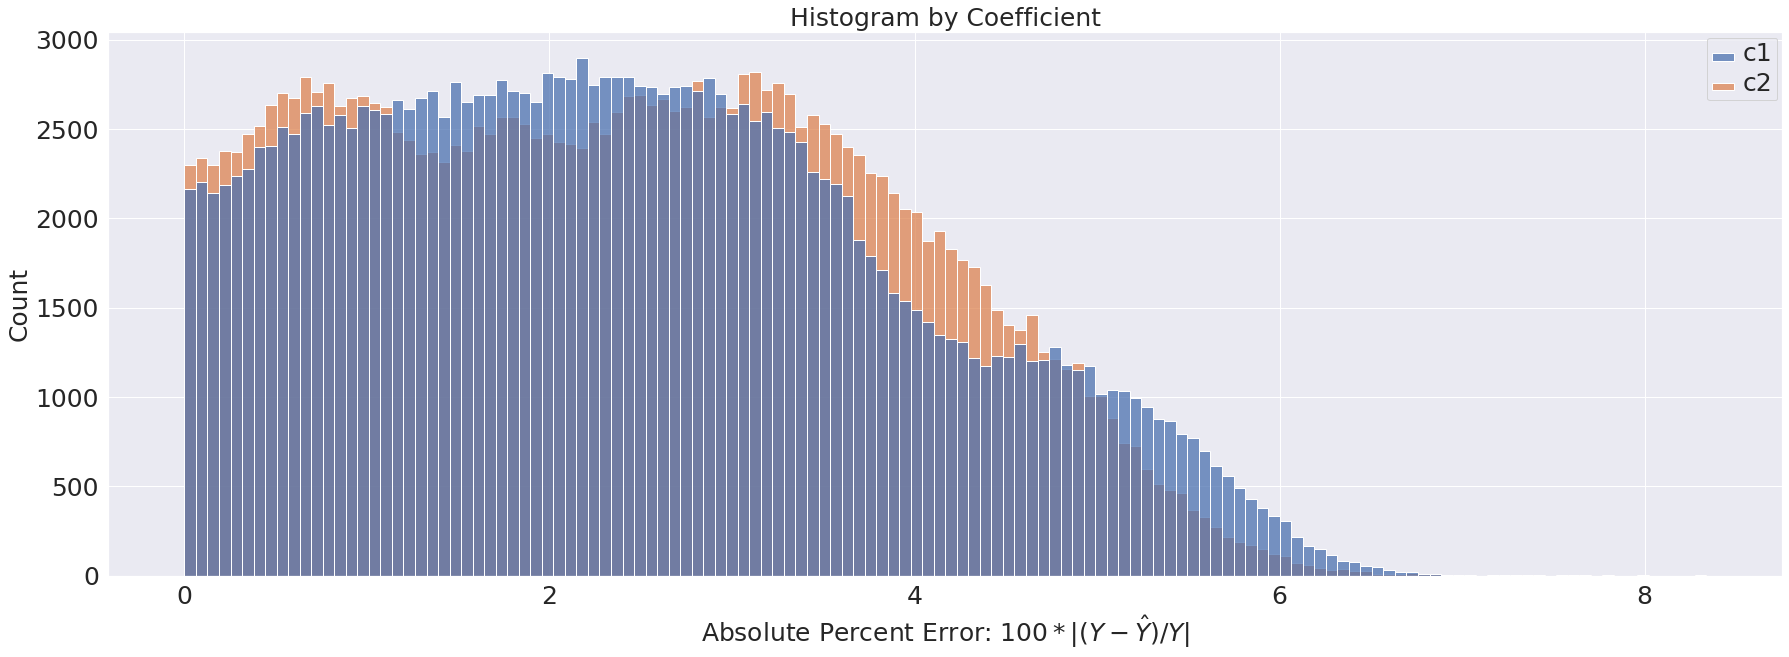

In [12]:
cv_predictions = ns.analysis.cross_validation('Results/spectra2eos/Predictions/validation_%05d_*.csv' % 61)
_, df_errors = ns.analysis.mape(cv_predictions, ['c1', 'c2'], ['pred_c1', 'pred_c2'])

ax = sns.histplot(data=df_errors.abs()); plt.setp(ax.get_legend().get_texts(), fontsize='25')
plt.xlabel(r'Absolute Percent Error: $100 * |(Y - \hat{Y}) / Y|$', fontsize=25); plt.title('Histogram by Coefficient', fontsize=25);

In [13]:
ns.analysis.get_poisson_command(paradigm='spectra2eos', trial=61)

To run poisson uncertainty augmentation:
 tf2 main.py --run_type uncertain --model_dir Results/spectra2eos/Models/00061/ --paradigm spectra2eos --load_settings_from Results/spectra2eos/Settings/00061.json


### Groupby Unique EOS

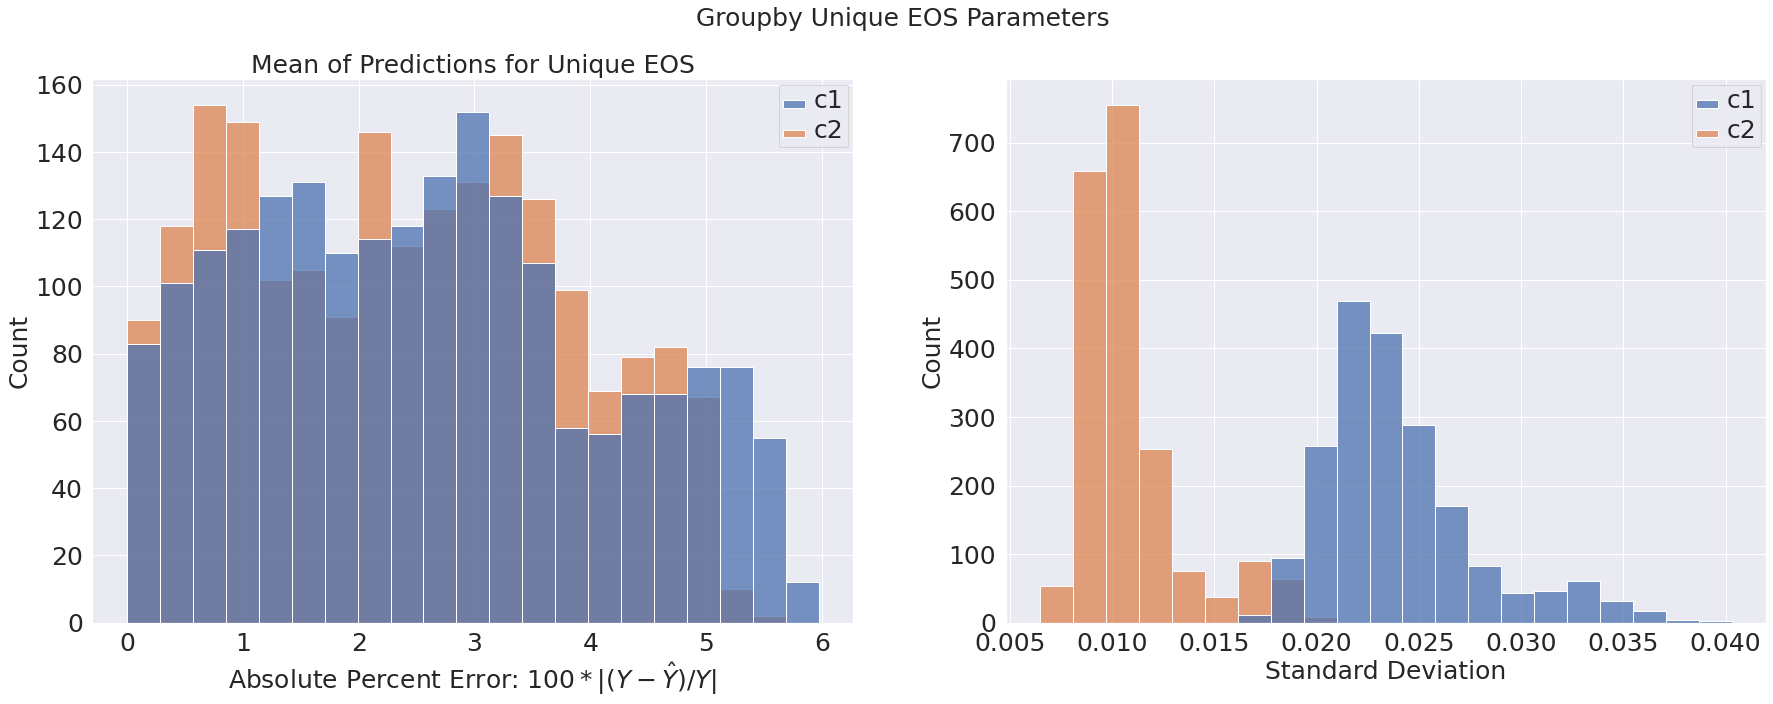

In [14]:
ns.analysis.groupby_unique_eos(cv_predictions)

### Poisson Noise

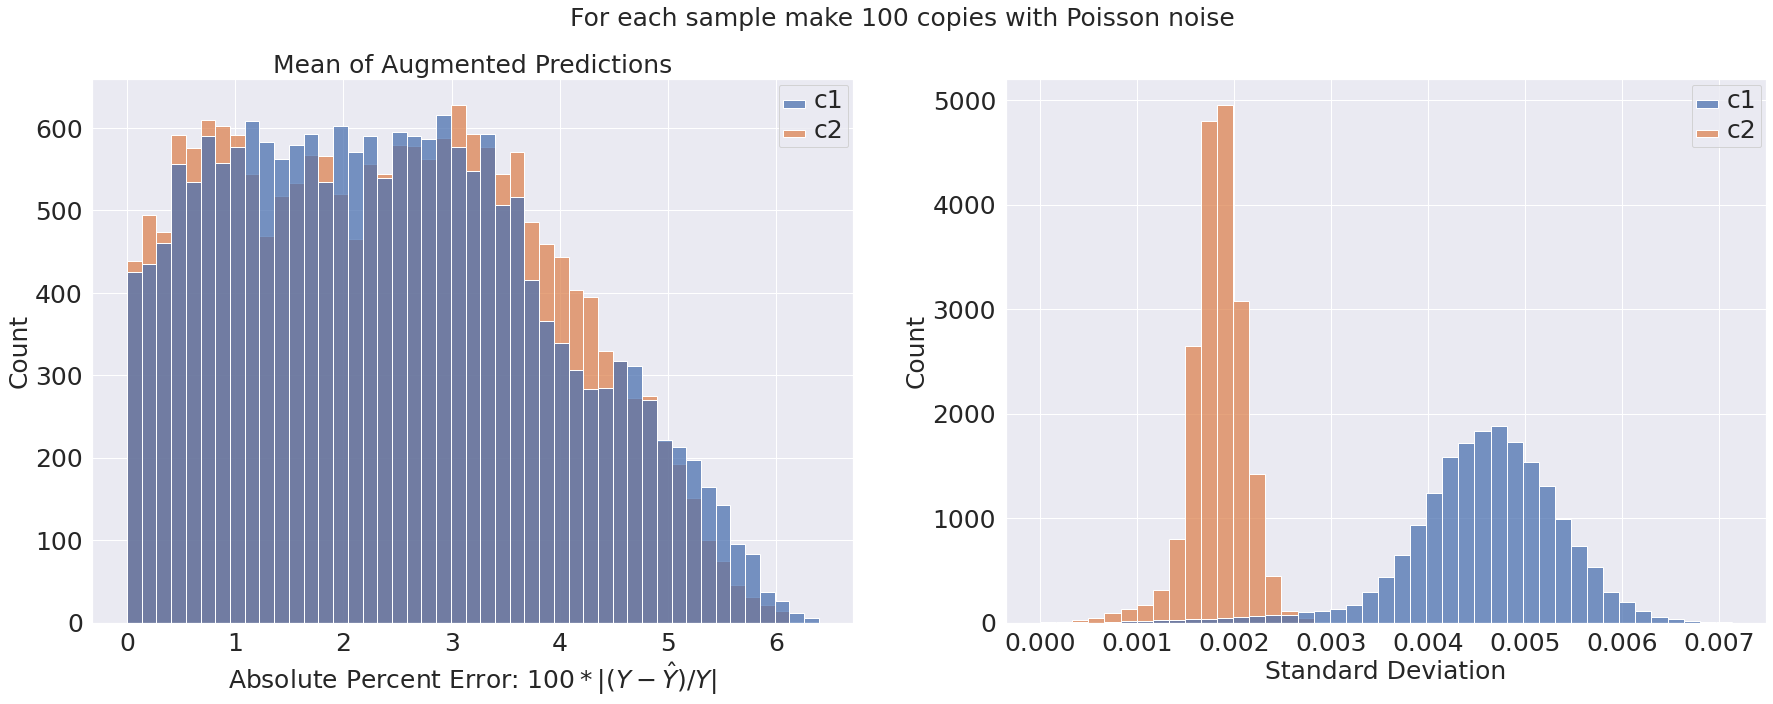

In [15]:
ns.analysis.groupby_poisson_noise('spectra2eos', trial=61)

# Spectra + Star --> EOS
---
### HP Search Results

In [14]:
training_df = pd.read_csv('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2eos/results.csv')
gb = training_df.groupby('Trial-ID').min()
idx = gb[gb.Objective < .1].index
training_df = training_df[training_df['Trial-ID'].isin(idx)]

In [15]:
hp_trial_erros = ns.analysis.calculate_hp_trial_errors(paradigm='spectra+star2eos', num_files=500, targets=['c1', 'c2'])

100%|██████████| 490/490 [01:46<00:00,  4.60it/s]


In [16]:
hp_trial_erros.sort_values(by='error').head(5)

,error
93,2.372359
271,2.373708
309,2.388745
355,2.389417
250,2.398408


In [17]:
best_trial_id = int(hp_trial_erros.idxmin())

test_file = '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2eos/Predictions/validation_%05d_01.csv' % best_trial_id
df = pd.read_csv(test_file, index_col=0)[['c1', 'c2', 'pred_c1', 'pred_c2']]
test_error, _ = ns.analysis.mse(df, ['c1', 'c2'], ['pred_c1', 'pred_c2'])

print('Best trial:', best_trial_id, 'Val:', hp_trial_erros.loc[best_trial_id].values, 'Test:', test_error)

Best trial: 93 Val: [2.37235908] Test: 0.008705305603106228


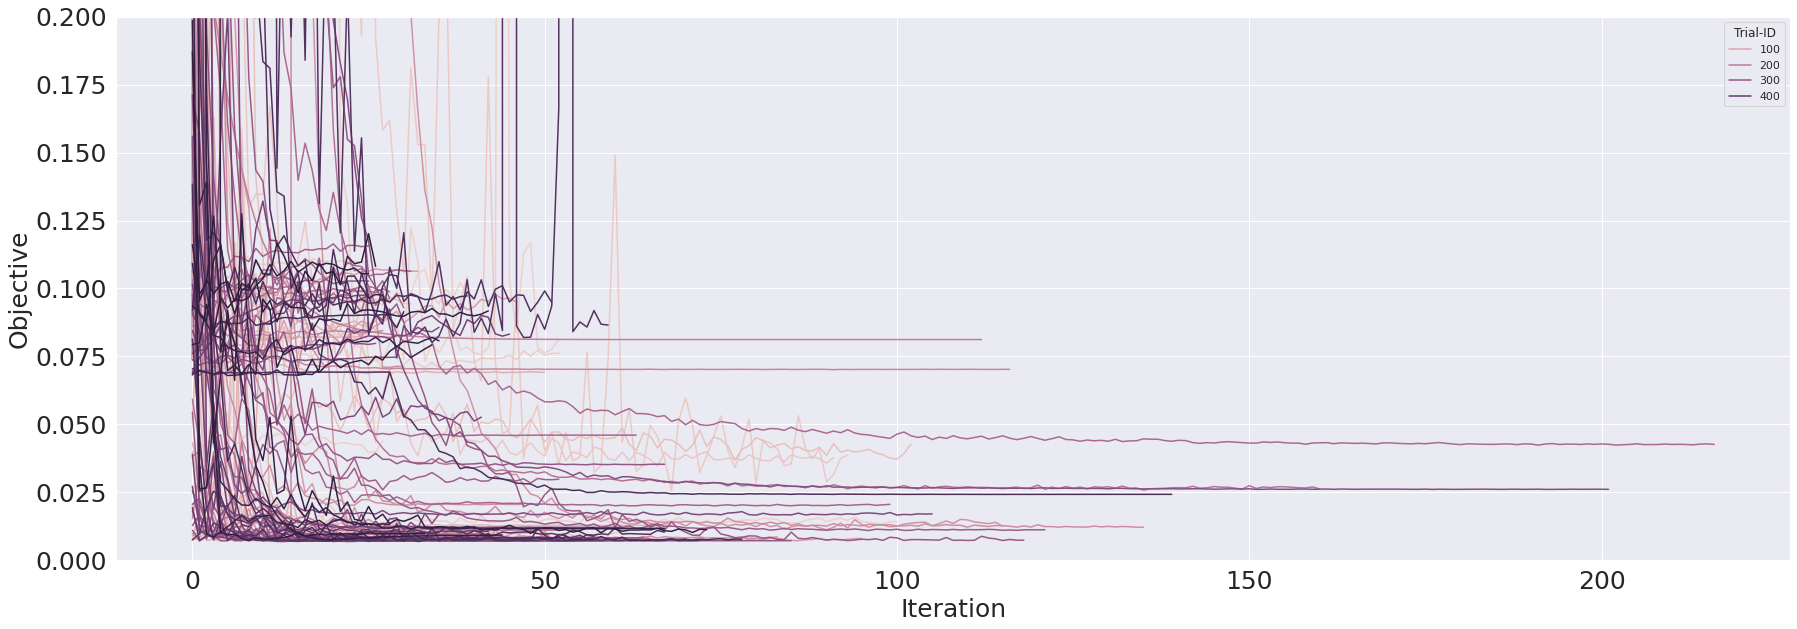

In [18]:
sns.lineplot(x='Iteration', y='Objective', data=training_df, hue='Trial-ID'); plt.ylim(0, .2);
sns.lineplot(x='Iteration', y='Objective', data=training_df[training_df['Trial-ID'] == best_trial_id], lw=5);

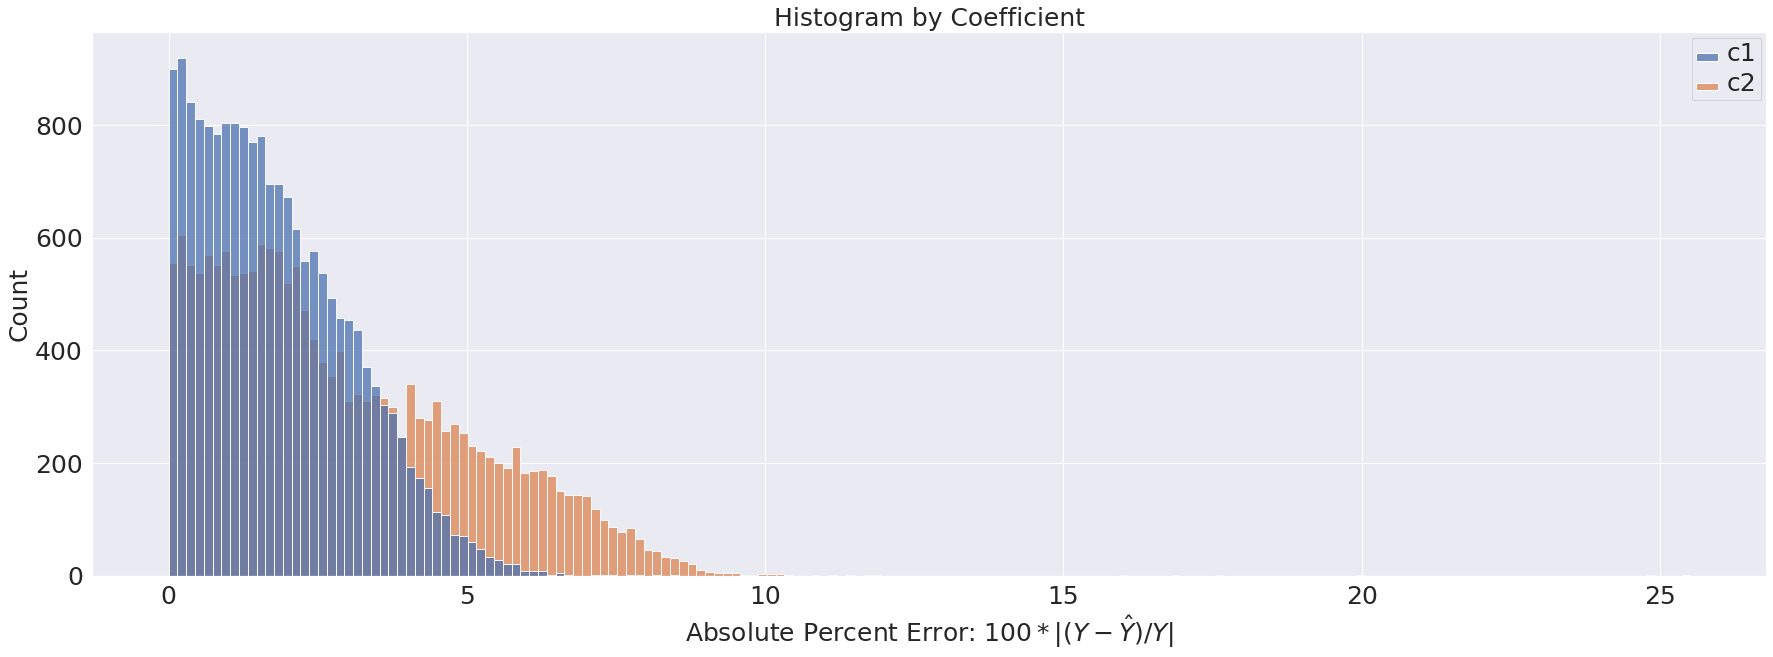

In [19]:
_, df_errors = ns.analysis.mape(df, ['c1', 'c2'], ['pred_c1', 'pred_c2'])

ax = sns.histplot(data=df_errors.abs()); plt.setp(ax.get_legend().get_texts(), fontsize='25')
plt.xlabel(r'Absolute Percent Error: $100 * |(Y - \hat{Y}) / Y|$', fontsize=25); plt.title('Histogram by Coefficient', fontsize=25);

In [20]:
# !cp $test_file .
# print("scp jott1@openlab.ics.uci.edu:/home/jott1/Projects/NeutronStars/" + test_file.split('/')[-1] + " .")

In [21]:
# args = {'load_settings_from' : '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2eos/Settings/%05d.json' % best_trial_id}
# ns.utils.load_settings(args)
# img = mpimg.imread('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2eos/Models/%05d/model.png' % best_trial_id)
# plt.imshow(img.transpose(1,0,2)[::-1]); plt.axis('off'); plt.show();
# args

### Cross Validation

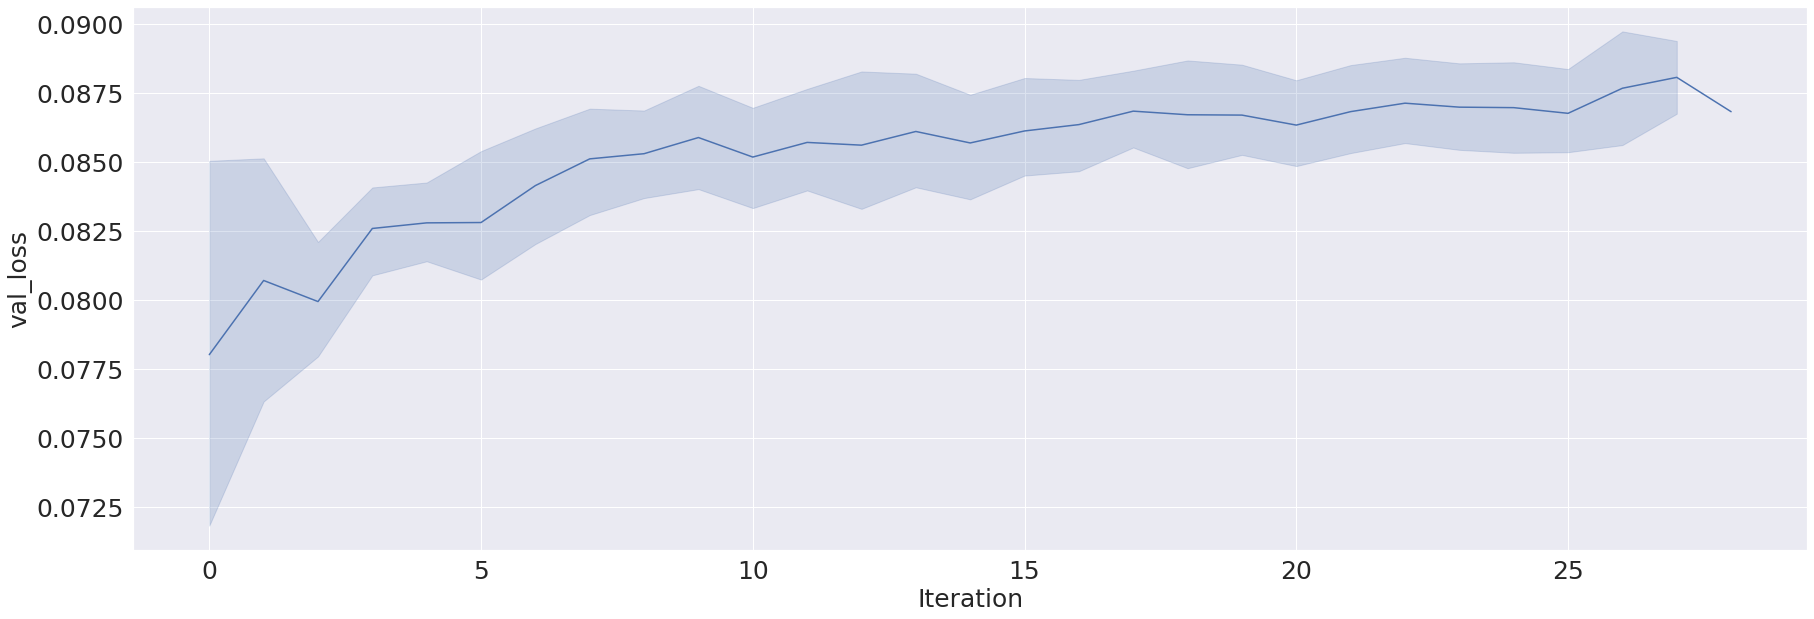

In [22]:
df = ns.analysis.cross_validation('Results/spectra+star2eos/Training/%05d_*.csv' % best_trial_id)
sns.lineplot(x='Iteration', y='val_loss', data=df);

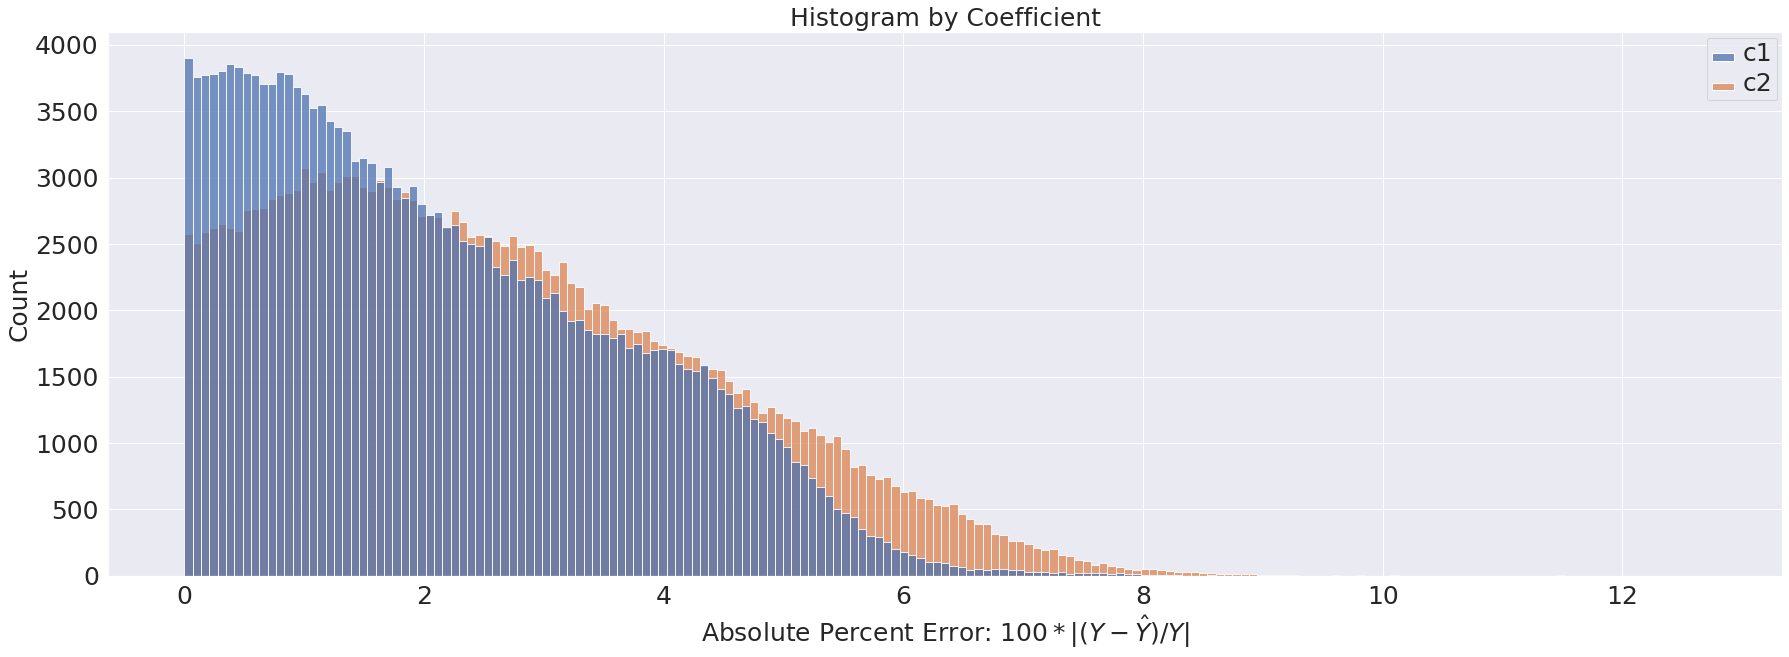

In [23]:
cv_predictions = ns.analysis.cross_validation('Results/spectra+star2eos/Predictions/validation_%05d_*.csv' % best_trial_id)
_, df_errors = ns.analysis.mape(cv_predictions, ['c1', 'c2'], ['pred_c1', 'pred_c2'])

ax = sns.histplot(data=df_errors.abs()); plt.setp(ax.get_legend().get_texts(), fontsize='25')
plt.xlabel(r'Absolute Percent Error: $100 * |(Y - \hat{Y}) / Y|$', fontsize=25); plt.title('Histogram by Coefficient', fontsize=25);

### Groupby Unique EOS

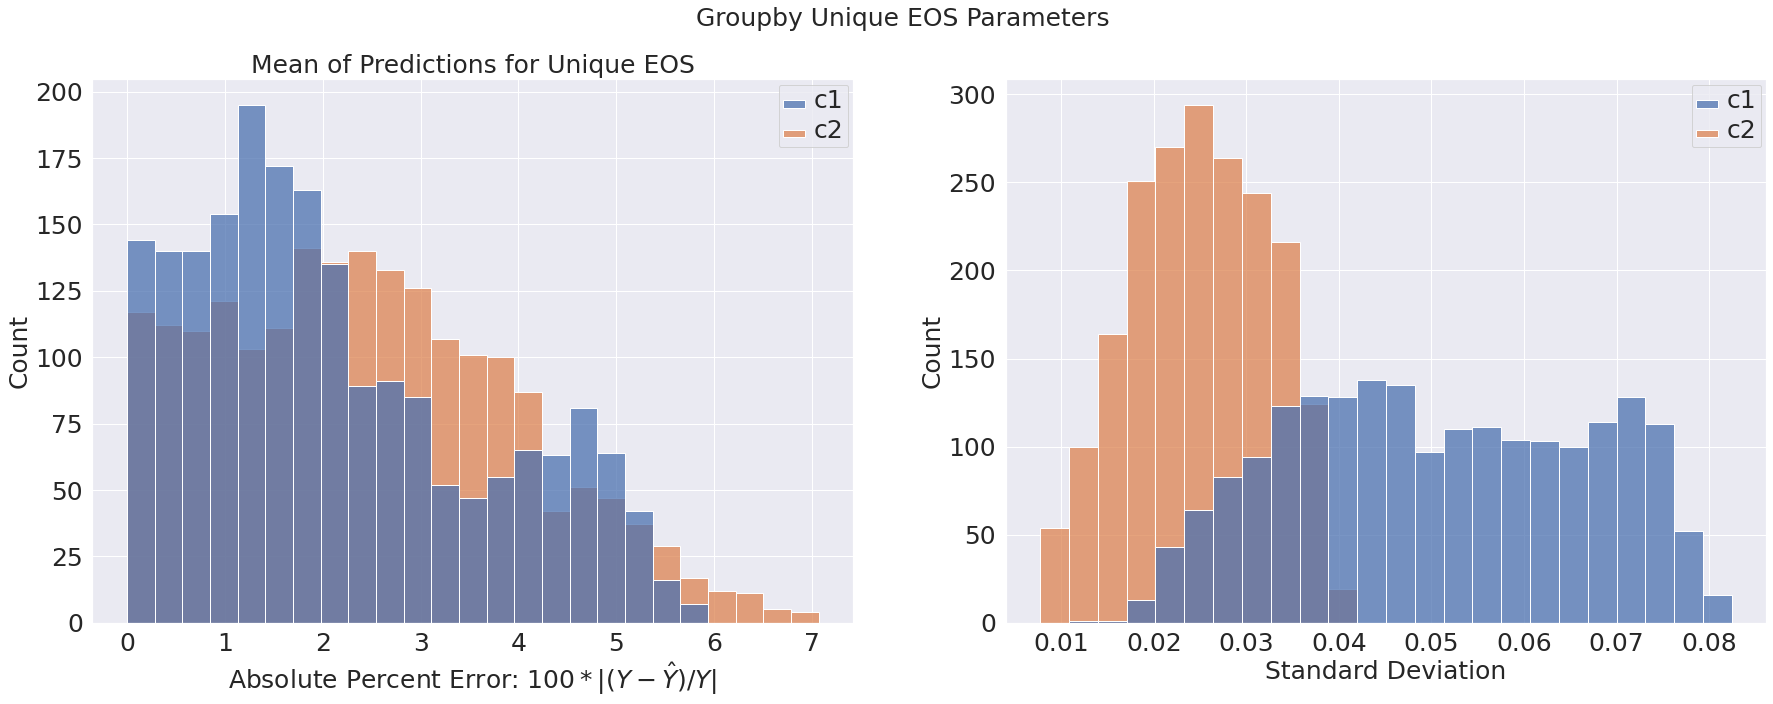

In [24]:
ns.analysis.groupby_unique_eos(cv_predictions)

### Poisson Noise

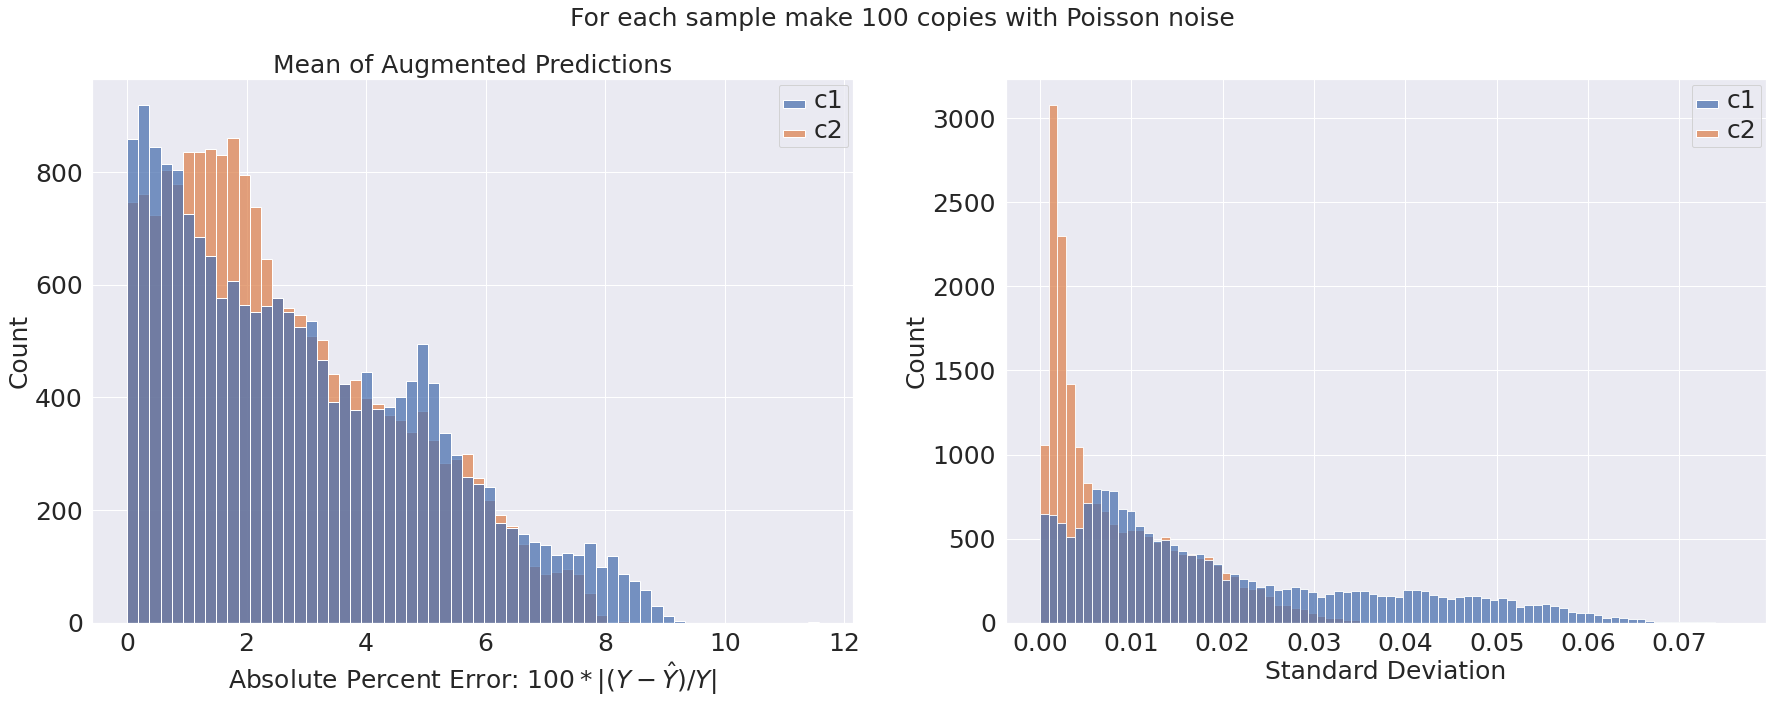

In [25]:
ns.analysis.groupby_poisson_noise('spectra+star2eos', trial=93)

# Spectra --> Star
---
### Training Results

In [26]:
hp_results_spectra2star = pd.read_csv('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/results.csv')

### Prediction Analysis

In [27]:
hp_trial_erros = ns.analysis.calculate_hp_trial_errors(paradigm='spectra2star', num_files=500, targets=['nH', 'logTeff', 'dist'])

100%|██████████| 489/489 [02:10<00:00,  3.75it/s]


In [28]:
hp_trial_erros.sort_values(by='error').head(5)

,error
86,17.174671
169,17.479213
411,17.624782
10,17.959996
186,18.184025


In [29]:
best_trial_id = int(hp_trial_erros.idxmin())

test_file = '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/Predictions/validation_%05d_01.csv' % best_trial_id
df = pd.read_csv(test_file, index_col=0)[['nH', 'logTeff', 'dist', 'pred_nH', 'pred_logTeff', 'pred_dist']]
test_error, _ = ns.analysis.mse(df, ['nH', 'logTeff', 'dist'], ['pred_nH', 'pred_logTeff', 'pred_dist'])

print('Best trial:', best_trial_id, 'Val:', hp_trial_erros.loc[best_trial_id].values, 'Test:', test_error)

Best trial: 86 Val: [17.17467112] Test: 1.4177865440598947


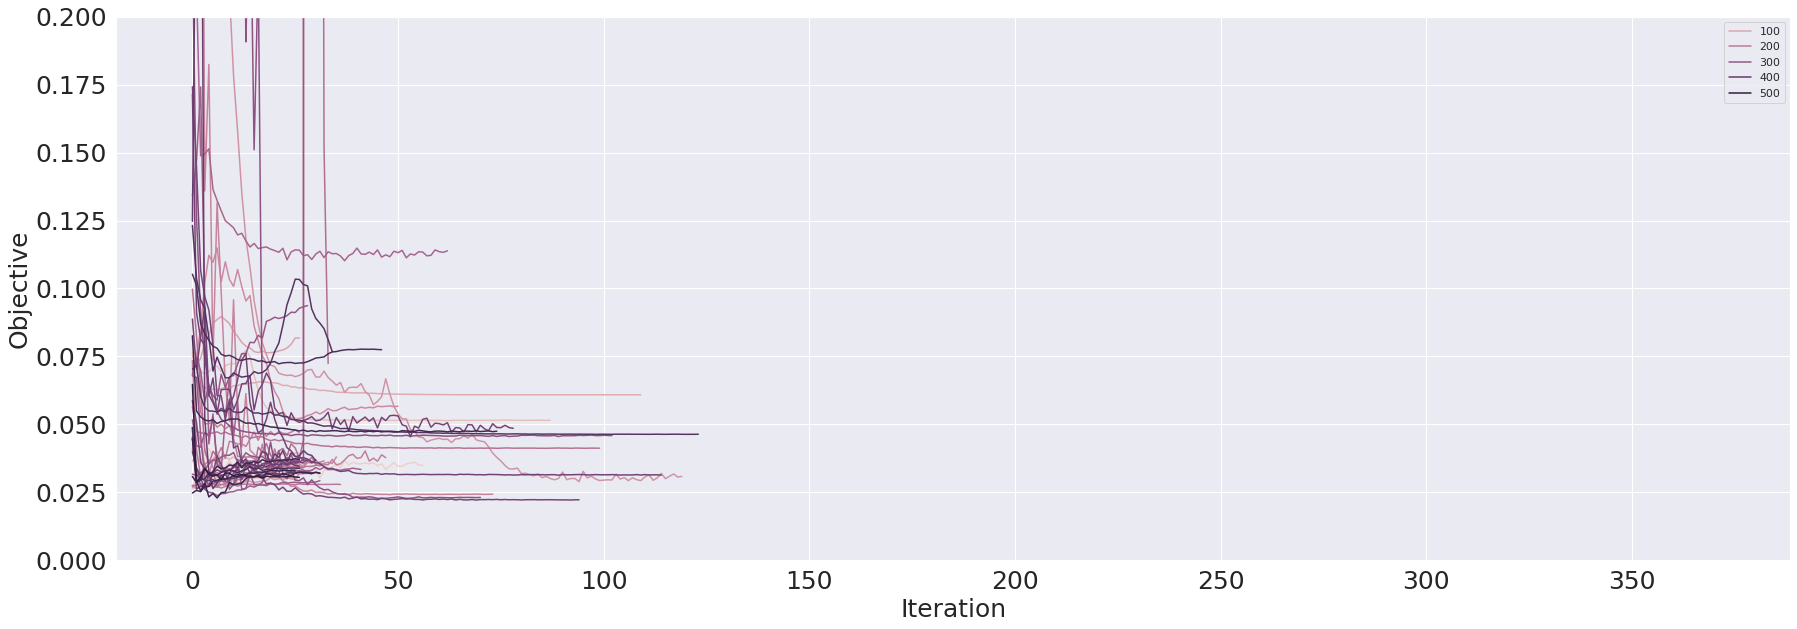

In [30]:
sns.lineplot(x='Iteration', y='Objective', data=hp_results_spectra2star, hue='Trial-ID'); plt.ylim(0, .2);
sns.lineplot(x='Iteration', y='Objective', data=hp_results_spectra2star[hp_results_spectra2star['Trial-ID'] == best_trial_id], lw=5);

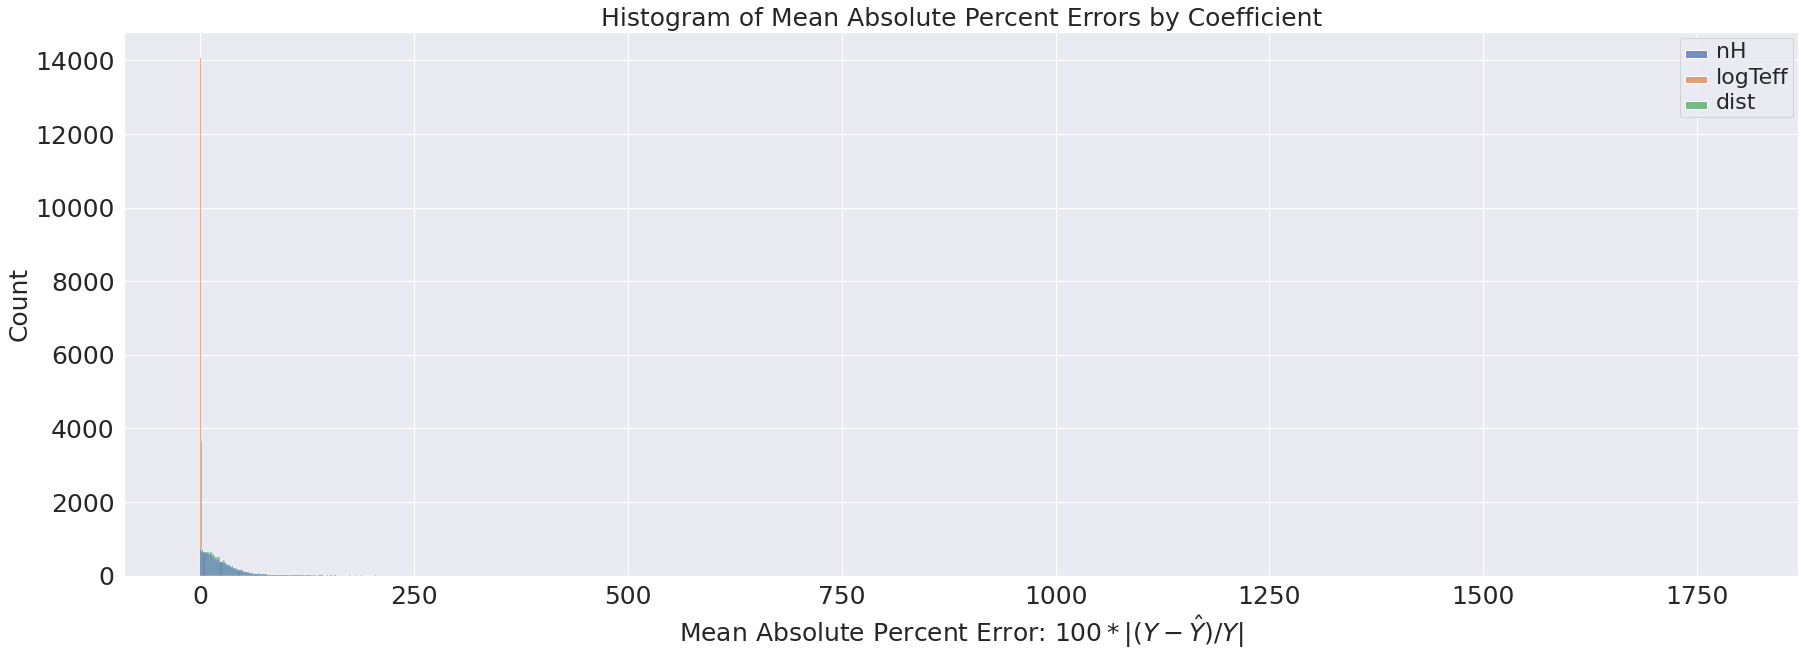

In [31]:
_, df_errors = ns.analysis.mape(df, ['nH', 'logTeff', 'dist'], ['pred_nH', 'pred_logTeff', 'pred_dist'])

ax = sns.histplot(data=df_errors.abs());
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.xlabel(r'Mean Absolute Percent Error: $100 * |(Y - \hat{Y}) / Y|$', fontsize=25);
plt.title('Histogram of Mean Absolute Percent Errors by Coefficient', fontsize=25);

In [32]:
args = {'load_settings_from' : '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/Settings/%05d.json' % best_trial_id, 'run_type': ''}
ns.utils.load_settings(args)
args

{'load_settings_from': '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/Settings/00086.json',
 'run_type': '',
 'activation': 'elu',
 'batch_norm': 1,
 'batch_size': 256,
 'dropout': 0.6402508548007683,
 'epochs': 500,
 'gpu': '0',
 'input_size': 250,
 'loss_function': 'mean_absolute_percentage_error',
 'lr': 0.003045568821522087,
 'lr_decay': 0.949164311722797,
 'model_dir': '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/Models/00086',
 'num_coefficients': 2,
 'num_folds': 1,
 'num_layers': 4,
 'num_nodes': 869,
 'output_dir': 'Results/',
 'output_size': 3,
 'paradigm': 'spectra2star',
 'patience': 25,
 'scaler_type': 'none2none',
 'sherpa': False,
 'skip_connections': 0,
 'trial_id': 86}